<a href="https://colab.research.google.com/github/pasquale90/mthesis/blob/master/Data_analysis/UrbanSound8k_DataAnalysis_and_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Στο UrbanSound8k_DataAnalysis_and_visualizations.ipynb πραγματοποιείται μια προεπεξεργαστική ανάλυση δεδομένων του dataset UrbanSound8k βάσει των αποτελεσμάτων της οποίας ενδέχεται είτε να προβούμε σε ομοιόμορφο διαμερισμό του περιεχομένου σε k-φακέλους(k-fold), είτε σε ενέργειες επέκτασης περιεχομένου (data augmentation) είτε στην εξαγωγή συμπερασμάτων και προβλέψεων βάσει *αυτών*.


In [0]:
#Import Google_drive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
#Import the vital libraries 
!pip install soundfile 

import os
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.io import wavfile                  *bit depth 24bit is not supported
import soundfile as sf
import librosa
import seaborn as sns
import scipy as sp


data_path='/content/gdrive/My Drive/dissertation/UrbanSound8K/metadata/'
audio_path='/content/gdrive/My Drive/dissertation/UrbanSound8K/audio/'

Παρακάτω εισάγουμε το αρχείο csv το οποίο και εμπεριέχει τις πληροφορίες των μεταδεδομένων και των κλάσεων για το κάθε αρχείο, καθώς και τα ηχητικά αρχεία προκειμένου να τα εισάγουμε σε μία λίστα από την οποία θα μπορούμε αργότερα να τα διαβάσουμε. Τέλος ελέγχουμε πως η διάθεση των αρχείων σε κάθε fold αλλά και στο σύνολο συμπίπτει με αυτή που αναφέρεται στο csv αρχείο, προκειμένου να εντοπίσουμε τυχόν αρχεία που δε μεταφορτώθηκαν και τυχόν λείπουν.

In [0]:
#Import Dataset 
ur8k = pd.read_csv(data_path+'UrbanSound8K.csv')

folds = os.listdir(audio_path)#(wavfiles are incuded in 10 different folders)

order={}
files={}
filesum=0

for f in folds:
    
  filelist = os.listdir(audio_path+f+'/')
   
  if (f[-1:]!='0'):
    num=f[-1:]
  elif(f[-1:]=='0'):#get the value of 10 instead of 0
    num=f[-2:]
  
  order[f]=int(num)
  files[f]=filelist

  filesum+=len(files[f])
  print('fold no_%d contains %d audio files'%(order[f],len(files[f]))) 
print('All in all there are %d audio files found in 8k Urban Sound dataset folders'%filesum)

print('..and csv containts {} rows and {} columns.'.format(len(ur8k.index),len(ur8k.columns)))

fold no_1 contains 873 audio files
fold no_3 contains 925 audio files
fold no_4 contains 990 audio files
fold no_5 contains 936 audio files
fold no_6 contains 823 audio files
fold no_7 contains 838 audio files
fold no_8 contains 806 audio files
fold no_9 contains 816 audio files
fold no_2 contains 888 audio files
fold no_10 contains 837 audio files
All in all there are 8732 audio files found in 8k Urban Sound dataset folders
..and csv containts 8732 rows and 8 columns.


In [0]:
#remove .DS_Store files-  #Removed 
#{have already run-no need to repeat the process}
'''
for foldnum in range(1,(len(folds)+1)):
  print('\nfoldnum=%d\n'%foldnum)
  for f in fold[foldnum]:
    if(f=='.DS_Store'):
      print(f)
      !rm str(audio_path+foldnum+'/'+f)
'''

"\nfor foldnum in range(1,(len(folds)+1)):\n  print('\nfoldnum=%d\n'%foldnum)\n  for f in fold[foldnum]:\n    if(f=='.DS_Store'):\n      print(f)\n      !rm str(audio_path+foldnum+'/'+f)\n"

In [0]:
#check if any file is missing
'''
import os.path

for num in range(1,len(fold)+1):
  search=ur8k.loc[ur8k['fold'] == num]
  num=str(num)
  for af in search.index:
  #print(ur8k['fold'].loc[af])
    if(not(os.path.isfile(audio_path+'fold'+num+'/'+af))):
      print(af)
'''

In [0]:
print(folds)

['fold1', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold2', 'fold10']


In [0]:
#folds ordered
folds={}
for key, value in sorted(order.items(), key=lambda item: item[1]):
  folds[value]= key
folds=list(folds.values())
print(folds)

['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']


Παρακάτω μελετάμε την κατανομη του πλήθους των αρχείων που εμπεριέχονται σε κάθε fold.

In [0]:
#Do a check to csv fold distribution
fold_count = ur8k.groupby(['fold'])['fold'].count()
print(fold_count)

fold
1     873
2     888
3     925
4     990
5     936
6     823
7     838
8     806
9     816
10    837
Name: fold, dtype: int64


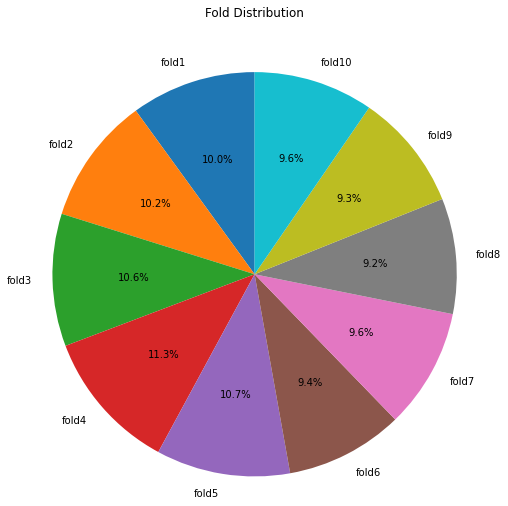

In [0]:
# Plot "Fold Distribution" (according to the sum of the files included in each of them)

fig ,ax = plt.subplots(figsize=(8,8))
ax.set_title('Fold Distribution', y=1.08)
ax.pie(fold_count, labels=folds, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [0]:
#Rename column 'class' to 'Class'
print(ur8k.columns)
ur8k.rename(columns={'class':'Class'}, inplace=True)
print('\n\ncolumn <class> became... <%s>'%ur8k.columns[-1])

Index(['slice_file_name', 'fsID', 'start', 'end', 'salience', 'fold',
       'classID', 'class'],
      dtype='object')


column <class> became... <Class>


In [0]:
classes =  list (np.unique(ur8k.Class))
print(classes)

['air_conditioner', 'car_horn', 'children_playing', 'dog_bark', 'drilling', 'engine_idling', 'gun_shot', 'jackhammer', 'siren', 'street_music']


Παρακάτω μελετάμε την κατανομη του πλήθους των αρχείων που διατίθενται για κάθε υπάρχουσα κλάση. Παρατηρούμε περιορισμένο πλήθος αρχείων συγκριτικά με τις υπόλοιπες κλάσεις, για τις κλάσεις car horn και gun shot. 

In [0]:
#Calculate count_of_files for each class
class_count=ur8k.groupby(['Class'])['Class'].count()
print('\tClass Count\n',class_count)

	Class Count
 Class
air_conditioner     1000
car_horn             429
children_playing    1000
dog_bark            1000
drilling            1000
engine_idling       1000
gun_shot             374
jackhammer          1000
siren                929
street_music        1000
Name: Class, dtype: int64


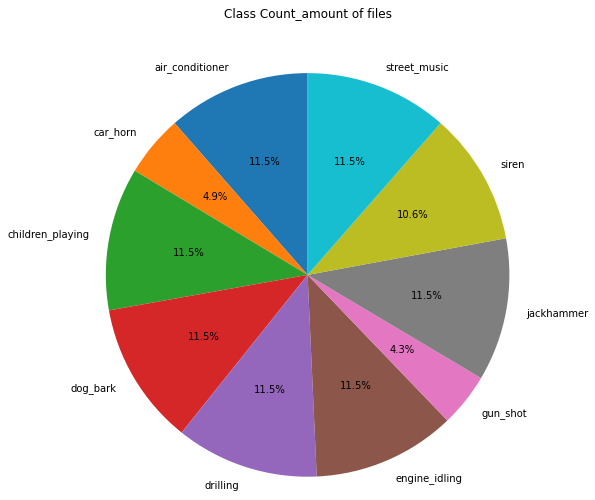

In [0]:
# Plot Class_count(according to the total amount of files for each class)
        #note:it shows almost the same thing with the next one..

fig ,ax = plt.subplots(figsize=(8,8))
ax.set_title('Class Count_amount of files', y=1.08)
ax.pie(class_count, labels=classes, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

# **Skillpoint** calculated_length

Παρακάτω υπολογίζουμε για κάθε αρχείο τη διάρκεια του και αποθηκεύουμε τις τιμές στο csv αρχείο στην νεοσύστατη στήλη 'length'. Έχοντας αποθηκεύσει εκ' των προτέρων το ανανεομένο αρχείο, το εισάγουμε σε μία νέα μεταβλητή 'us8k' για λόγους οικονομίας.  

In [0]:
#Calculate the length of each file 
#{Load the file instead of running it again....
                      #...8732 files are a considerable amount of files to calc}
'''
for f in tqdm(folds):
  #print(f)
  for af in (files[f]):
    #print(af)
    path=str(audio_path+f+'/'+af)
    #print(path)
    signal, rate = sf.read(path)#, channels=1, samplerate=44100, subtype='FLOAT'
    #rate, signal = wavfile.read(path)
    ur8k.at[af, 'length']=signal.shape[0]/rate

ur8k.reset_index(inplace=True)
ur8k.to_csv(data_path+'ur8k_length.csv',header=True,index=False)
ur8k.set_index('slice_file_name',inplace=True)
'''
#LOAD THE STORED CSV 
us8k=pd.read_csv('/content/gdrive/My Drive/dissertation/UrbanSound8K/metadata/ur8k_length.csv')

#dataset length_dist basic statistics
print('Outdated:\t{}\n'.format(ur8k.shape))
print('Updated:\t{}\n'.format(us8k.shape))
print('Total length described\n',us8k['length'].describe())

Outdated:	(8732, 8)

Updated:	(8732, 9)

Total length described
 count    8732.000000
mean        3.607501
std         0.974388
min         0.050000
25%         4.000000
50%         4.000000
75%         4.000000
max         4.036647
Name: length, dtype: float64


Παρακάτω διαγράφονται οι τιμές της στήλης length για το σύνολο των αρχείων. Όπως παρατηρούμε, εκ' των 8732 αρχείων, περισσότερα από 7000 αρχεία έχουν διάρκεια περίπου 4 δευτερόλεπτα.

Text(0, 0.5, 'Quantity')

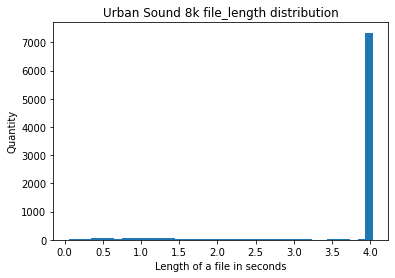

In [0]:
plt.hist(us8k['length'],bins = int(40))

plt.title('Urban Sound 8k file_length distribution')
plt.xlabel('Length of a file in seconds')
plt.ylabel('Quantity')

Παρακάτω μελετάμε την κατανομη της διάρκειας των αρχείων για κάθε υπάρχουσα κλάση. Ως αναμενόμενο, παρατηρούμε αναλογική(σύμφωνα με το πλήθος-class_count) και περιορισμένη διάρκεια αρχείων συγκριτικά με τις υπόλοιπες κλάσεις, για τις κλάσεις car horn και gun shot, καθώς και dog bark. 

In [0]:
#Calculate mean_length for each class
class_dist = us8k.groupby(['Class'])['length'].mean()
print('\tClass Distribution\n',class_dist)
print("\n")

#Calculate deviation for each class
class_dev = us8k.groupby(['Class'])['length'].std()
print('\tClass Deviation\n',class_dev)
print("\n")

	Class Distribution
 Class
air_conditioner     3.994928
car_horn            2.456123
children_playing    3.962095
dog_bark            3.148281
drilling            3.546295
engine_idling       3.935952
gun_shot            1.647699
jackhammer          3.610548
siren               3.910314
street_music        4.000000
Name: length, dtype: float64


	Class Deviation
 Class
air_conditioner     0.093128
car_horn            1.618848
children_playing    0.267619
dog_bark            1.331572
drilling            1.007387
engine_idling       0.370909
gun_shot            0.902516
jackhammer          0.885867
siren               0.502674
street_music        0.000000
Name: length, dtype: float64




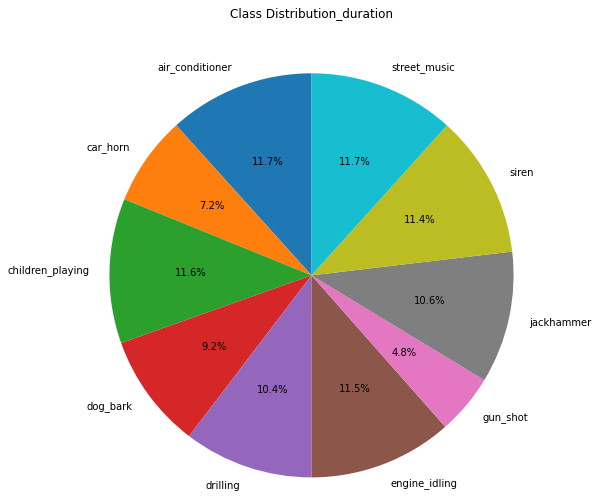

In [0]:
# Plot "Class Distribution" (according to the total length of the files for each class)

fig ,ax = plt.subplots(figsize=(8,8))
ax.set_title('Class Distribution_duration', y=1.08)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%', shadow=False, startangle=90 ,radius=37)
ax.axis('equal')#circle
plt.show()

In [0]:
us8k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8732 entries, 100032-3-0-0.wav to 99812-1-6-0.wav
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fsID      8732 non-null   int64  
 1   start     8732 non-null   float64
 2   end       8732 non-null   float64
 3   salience  8732 non-null   int64  
 4   fold      8732 non-null   int64  
 5   classID   8732 non-null   int64  
 6   Class     8732 non-null   object 
 7   length    8732 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 614.0+ KB


Παρακάτω μελετάμε την κατανομη της διάρκειας των αρχείων για κάθε υπάρχουσα κλάση και ξεχωριστά για κάθε ξεχωριστό fold. Σε γενικές γραμμές παρατηρούτε μια ομοιομορφία, ενώ σημειώνονται μικρές αποκλίσεις όπως για πχ. για το fold4 όπου και για τη κλάση siren, υπάρχει μεγαλύτερη συγκέντρωση βάσει του ποσοστιαίου μεγέθους της χρονικής διάρκειας.     

In [0]:
fold_dist=us8k.groupby(['fold','Class'])['Class'].count()#8 files of each class in each fold
print(fold_dist)

fold  Class           
1     air_conditioner     100
      car_horn             36
      children_playing    100
      dog_bark            100
      drilling            100
                         ... 
10    engine_idling        93
      gun_shot             32
      jackhammer           96
      siren                83
      street_music        100
Name: Class, Length: 100, dtype: int64


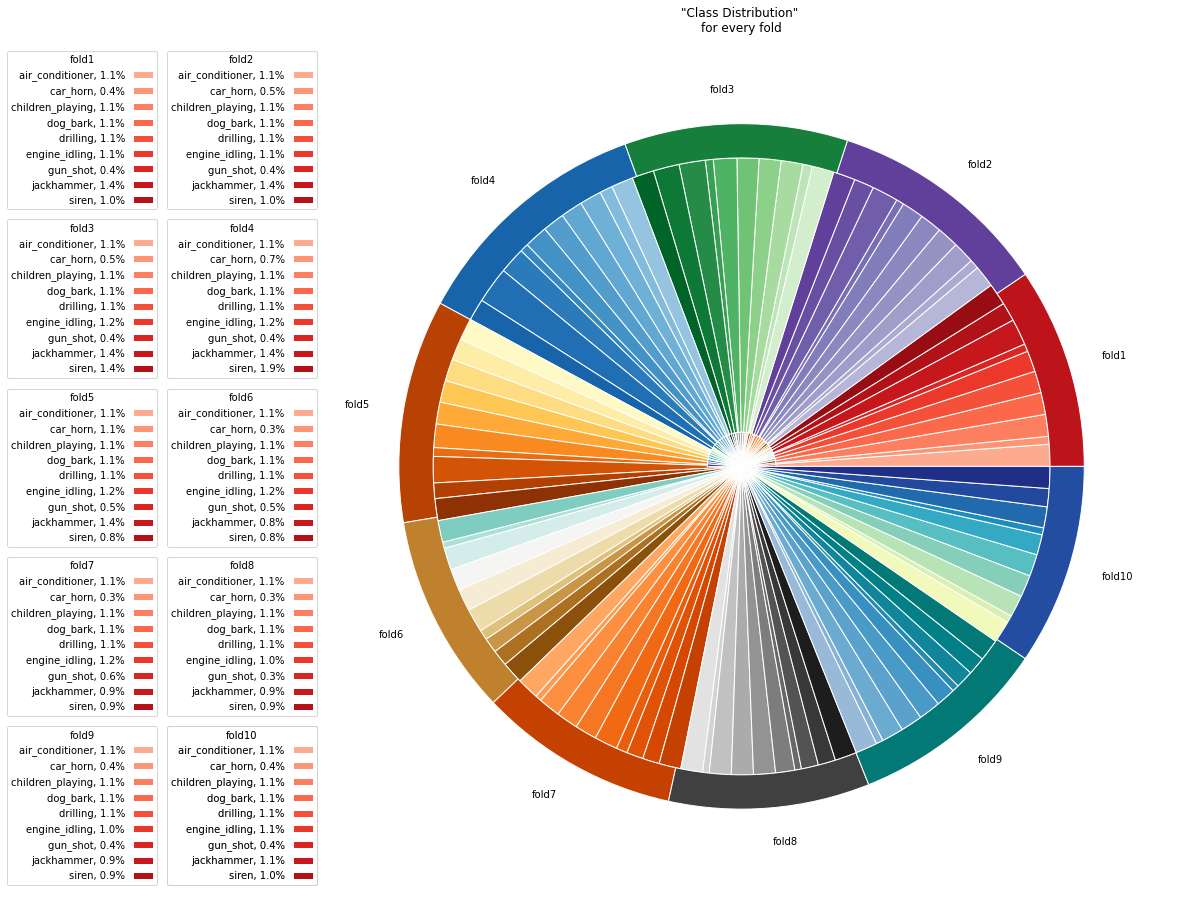

In [0]:
# Plot FOLD DISTRIBUTION

#Percentage of files for each folder
fpf=np.array((us8k.groupby(['fold'])['Class'].count()/len(us8k.index)*100).astype(int))
#fpf_{values passed- percentage/fold} = ....
#....[ 9.99770957 10.16949153 10.59322034 11.3376088  10.71919377  
                        #9.42510307 9.59688502  9.23041686  9.34493816  9.58543289] 

cpf=np.array((fold_dist/len(us8k.index))*100)#class percentage in each folder
#cpf = np.array(np.ones(100)*)

fig ,ax = plt.subplots(figsize=(7,7))
fig.subplots_adjust(0.3,-2, 2,1,1)#experimental values

size = 0.1#size of the outer
total = sum(fold_dist)

#Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
#'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu','GnBu',
#'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'

#one for each fold
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Purples
cmap3 = plt.cm.Greens
cmap4 = plt.cm.Blues
cmap5 = plt.cm.YlOrBr
cmap6 = plt.cm.BrBG_r
cmap7 = plt.cm.Oranges
cmap8 = plt.cm.Greys
cmap9 = plt.cm.PuBuGn
cmap10 = plt.cm.YlGnBu

outer_colors = [cmap1(.8), cmap2(.8), cmap3(.8),cmap4(.8),cmap5(.8),
                cmap6(.8), cmap7(.8),cmap8(.8),cmap9(.8),cmap10(.8)]
inner_colors = [*cmap1(np.linspace(.3, .9, 10)),
                *cmap2(np.linspace(.4, .8, 10)),
                *cmap3(np.linspace(.2, .9, 10)),
                *cmap4(np.linspace(.4, .8, 10)),
                *cmap5(np.linspace(.1, .9, 10)),
                *cmap6(np.linspace(.3, .9, 10)),
                *cmap7(np.linspace(.4, .8, 10)),
                *cmap8(np.linspace(.2, .9, 10)),
                *cmap9(np.linspace(.4, .8, 10)),
                *cmap10(np.linspace(.1, .9, 10)),]

ax.pie(cpf, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=1, edgecolor='w'))

ax.pie(fpf, radius=1, labels=folds, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal", title='\"Class Distribution\" \nfor every fold')

params= ['lower right','lower left','upper right','upper left']
u=-0.67
bbox=[0,0,0,0,u,u,u,u,2*u,2*u]
for i in range(len(folds)):
  f=i+1
  floor=(f-1)*10 #0-10-20-30-40
  ceiling=(f*10)-1  #9-19-29-39-49

  leg=ax.legend(
    loc=params[i%4],
    labels=['%s, %1.1f%%' % (
    l,(float(s) / total) * 100) for l, s in zip(classes, fold_dist[floor:ceiling])],
    bbox_to_anchor=(0.0, bbox[i]),
    bbox_transform=fig.transFigure,
    markerfirst=False,
    title=folds[f-1]#title='Class percentage per fold'
  )
  ax.add_artist(leg);

Παρακάτω εξάγουμε τις κυμματομορφές, τα DFTs, τα FFTs καθώς και τα Mel φασματογραφήματα αποκλειστικά για τα πρώτα αρχεία που διαβάζονται και αντιπροσωπέυουν την κάθε ξεχωριστή κλάση. 

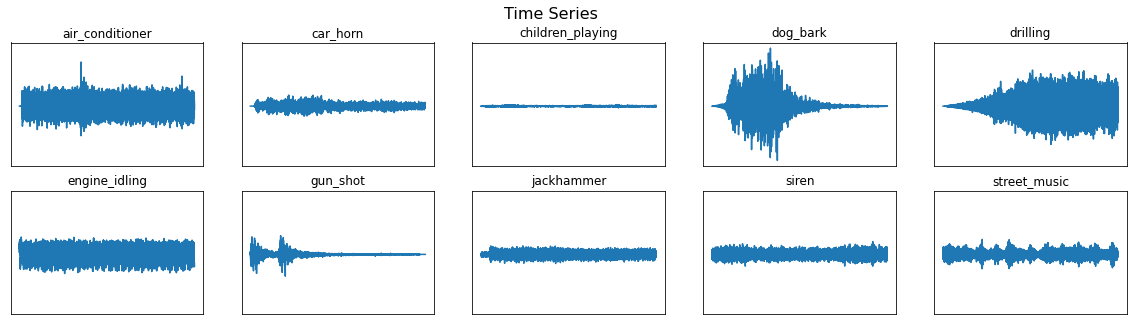

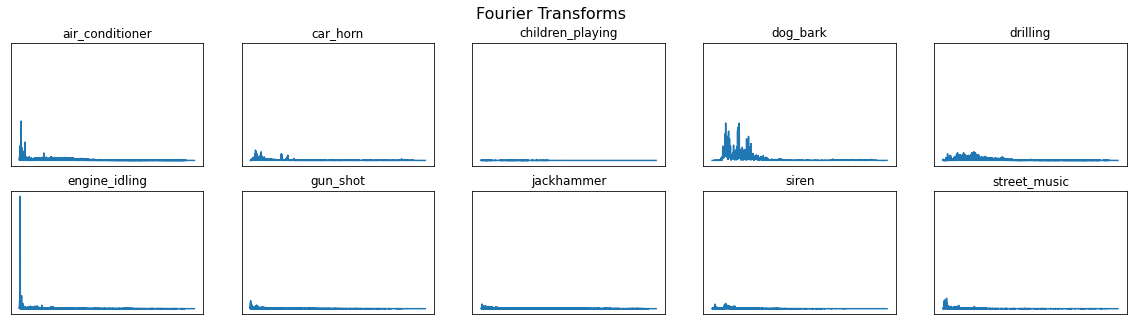

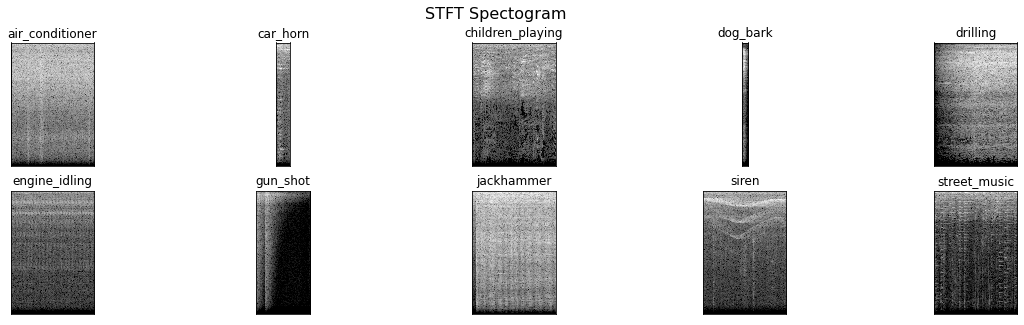

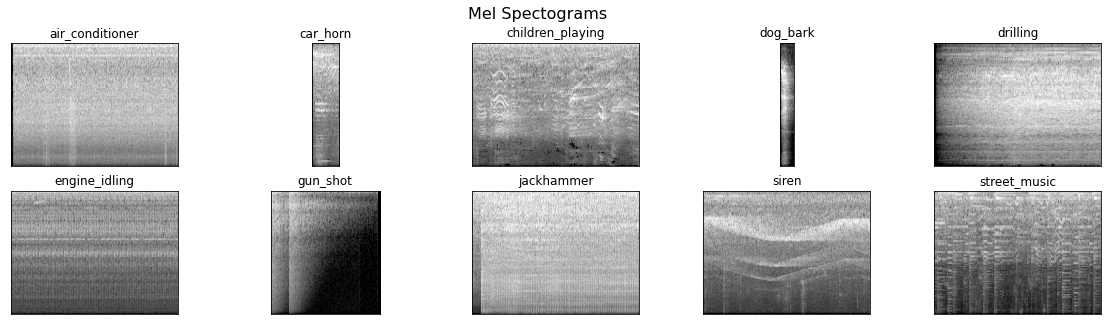

In [0]:
#PLOTS {Waveform, Spectrum, STFT-linear spectogram, log-Mel Spectogram}
#plot only the first file's info, for each of the 10 different classes

'''
***find an optimal window: http://support.ircam.fr/docs/AudioSculpt/3.0/co/Window%20Size.html ***
'''

def plot_signals(signals):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Time Series', size=16)
  i=0
  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(signals.keys())[i])
      axes[x,y].plot(list(signals.values())[i])
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1

def plot_fft(fft):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Fourier Transforms', size=16)
  i=0

  for x in range(2):
    for y in range(5):
      data = list(fft.values())[i]
      Y, freq =  data[0], data[1]
      axes[x,y].set_title(list(fft.keys())[i])
      axes[x,y].plot(freq, Y)
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

def calc_fft(y,rate):
  n = len(y)
  freq = np.fft.rfftfreq(n, d=1/rate)#d = periodos tou simatos
  Y = abs(np.fft.rfft(y)/n)#/n is the normalize factor(n=length of the signal)
  return(Y, freq)

def plot_linspectogram(stft):#as a spectogram
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('STFT Spectogram', size=16)
  i=0
  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(stft.keys())[i])
      axes[x,y].imshow(list(stft.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 


def plot_melspectogram(melspectograms):
  fig, axes = plt.subplots(nrows=2,ncols=5,sharex=False,sharey=True,figsize=(20,5))
  fig.suptitle('Mel Spectograms', size=16)
  i=0

  for x in range(2):
    for y in range(5):
      axes[x,y].set_title(list(melspectograms.keys())[i])
      axes[x,y].imshow(list(melspectograms.values())[i], cmap='gray', interpolation='nearest')
      axes[x,y].get_xaxis().set_visible(False)
      axes[x,y].get_yaxis().set_visible(False)
      i +=1 

signals = {}
fft = {}
stft = {}
melspectograms = {}

nfft=1024  #The spectrum is equally split into images representing a 1024/44100=23ms duration.
win_size=1024 #window is = 44100/1024=43ms  ->f0(lowest_aprox_freq)=5*(43)=215Hz
hop_size=int(round(win_size/2)) 
nmels=128


for c in classes:
  wav_file = us8k[us8k.Class == c].iloc[0,0]#one sample for each class_the first

  pos=us8k['fold'].loc[us8k['slice_file_name']==wav_file].values[0]-1
  
  signal, rate = librosa.load(audio_path+folds[pos]+'/'+wav_file)#audio_path is already set on top

  #print(rate)#44100

  signals[c]=signal

  fft[c]= calc_fft(signal,rate)


  stfts= librosa.core.stft(signal, n_fft=nfft) #, hop_length=hop_size, win_length=win_size
  magnitude = np.abs(stfts)
  db_stft = librosa.amplitude_to_db(magnitude,ref=np.max)
  stft[c] = db_stft
  #stft[c] = magnitude

  S=librosa.feature.melspectrogram(y=signal.astype(float), sr=rate, n_fft=nfft, 
                                   S=None, power=2,n_mels=nmels )
  log_S = librosa.power_to_db(S, ref=np.max)
  melspectograms[c]=log_S 
                                    
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_linspectogram(stft)
plt.show()

plot_melspectogram(melspectograms)
plt.show()